In [1]:
import datasets

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import SubsetRandomSampler
device = torch.device("cuda:0")

In [4]:
train_folder = 'D:/CernDataset'
dataset = datasets.CernDatasetFullEvo(train_folder)

In [5]:
model = torch.load('../models/full_model_54.pth')
model.to(device);

In [6]:
from torch.utils.data.sampler import Sampler
class SubsetSampler(Sampler):
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in range(len(self.indices)))

    def __len__(self):
        return len(self.indices)

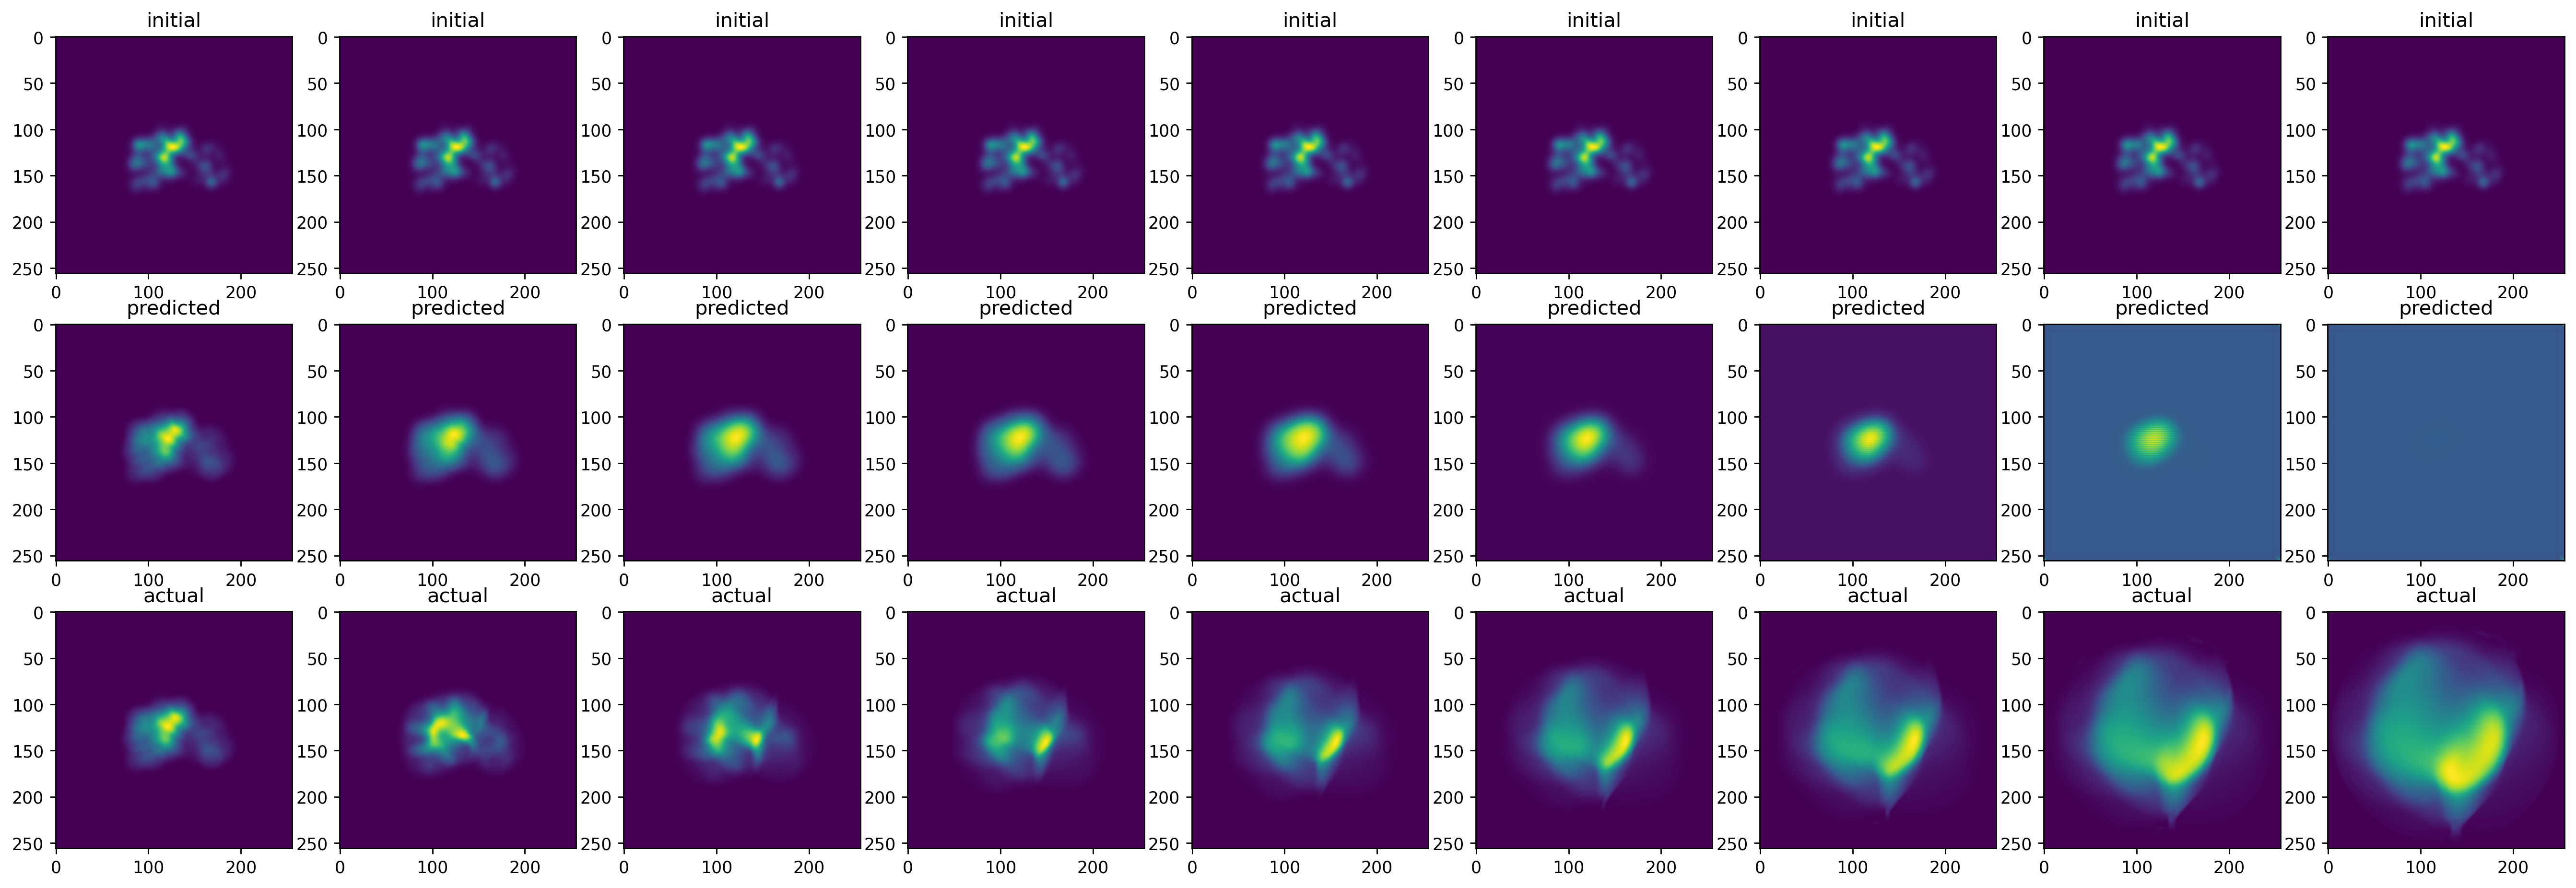

In [16]:
model.eval()
indices = list(range(2))
sampler = SubsetSampler(indices)
loader = torch.utils.data.DataLoader(dataset,
                                     sampler=sampler)
fig = plt.figure(figsize=(27,9), dpi=250)

for counter, (x, y) in enumerate(loader):
    if counter > 0:
        break
        
    t = x.to(device)
    for k in range(9):
        prediction_gpu = model(t)
        prediction = prediction_gpu.cpu().detach()
        fig.add_subplot(3, 9, k + 1)
        plt.title("initial")
        plt.imshow(torch.squeeze(x))
        fig.add_subplot(3, 9, k + 9 + 1)
        plt.title("predicted")
        plt.imshow(torch.squeeze(prediction))
        fig.add_subplot(3, 9, k + 18 + 1)
        plt.title("actual")
        plt.imshow(torch.squeeze(y[:,k,:, :]))
        t = prediction_gpu
        del prediction_gpu
    plt.savefig('../plots/full_evo_prediction_bad.png')
